In [2]:
import requests

def get_coingecko_data(coin_id, vs_currency='usd'):
    base_url = "https://api.coingecko.com/api/v3/simple/price"
    params = {
        'ids': coin_id,
        'vs_currencies': vs_currency
    }
    
    try:
        response = requests.get(base_url, params=params, timeout=10)
        response.raise_for_status()  # بررسی وضعیت پاسخ
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

# مثال: دریافت قیمت بیت‌کوین به دلار
coin_id = "bitcoin"
data = get_coingecko_data(coin_id)
print(data)


{'bitcoin': {'usd': 103181}}


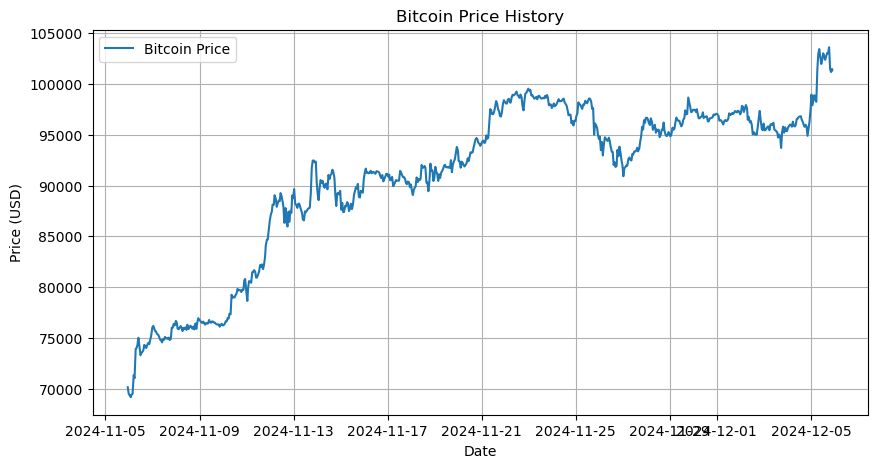

In [3]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_coingecko_historical_data(coin_id, vs_currency='usd', days=30):
    base_url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        'vs_currency': vs_currency,
        'days': days
    }
    
    try:
        response = requests.get(base_url, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

def plot_price_history(data, coin_id):
    if "error" in data:
        print(data["error"])
        return
    
    prices = data.get('prices', [])
    dates = [datetime.fromtimestamp(price[0]/1000) for price in prices]
    values = [price[1] for price in prices]
    
    plt.figure(figsize=(10,5))
    plt.plot(dates, values, label=f'{coin_id.capitalize()} Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{coin_id.capitalize()} Price History')
    plt.legend()
    plt.grid(True)
    plt.show()

# مثال: نمایش تاریخچه قیمت بیت‌کوین در 30 روز گذشته
coin_id = "bitcoin"
historical_data = get_coingecko_historical_data(coin_id, days=30)
plot_price_history(historical_data, coin_id)


نام ارز (مثلاً bitcoin): tether
تعداد روزها برای نمایش تاریخچه قیمت (مثلاً 30): 15


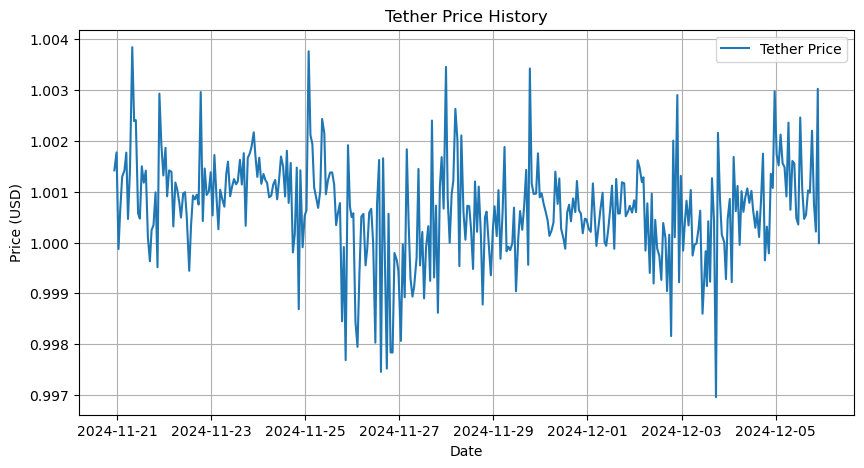

In [4]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_coingecko_historical_data(coin_id, vs_currency='usd', days=30):
    base_url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        'vs_currency': vs_currency,
        'days': days
    }
    
    try:
        response = requests.get(base_url, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

def plot_price_history(data, coin_id):
    if "error" in data:
        print(data["error"])
        return
    
    prices = data.get('prices', [])
    dates = [datetime.fromtimestamp(price[0]/1000) for price in prices]
    values = [price[1] for price in prices]
    
    plt.figure(figsize=(10,5))
    plt.plot(dates, values, label=f'{coin_id.capitalize()} Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{coin_id.capitalize()} Price History')
    plt.legend()
    plt.grid(True)
    plt.show()

# دریافت ورودی کاربر برای تایم فریم
coin_id = input("نام ارز (مثلاً bitcoin): ").strip().lower()
days = input("تعداد روزها برای نمایش تاریخچه قیمت (مثلاً 30): ").strip()

# اعتبارسنجی ورودی
try:
    days = int(days)
except ValueError:
    print("تعداد روزها باید یک عدد صحیح باشد.")
    exit()

historical_data = get_coingecko_historical_data(coin_id, days=days)
plot_price_history(historical_data, coin_id)
